# 01 Data Exploration

This notebook explores the single-cell RNA-seq dataset to understand:
- Dataset size and composition (cells × genes)
- Metadata columns (`.obs`)
- Gene naming and normalization
- Label distribution (cell types)
- Example cell expression profiles


In [1]:
!pwd

/mnt/d/Study/Python Scripts/scimilarity-finetune


# Imports and setup

In [2]:

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mygene


# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


# Load dataset

In [3]:
adata = sc.read_h5ad("data/raw/dataset.h5ad")
print(f"Shape (cells x genes): {adata.shape}")

Shape (cells x genes): (65479, 31460)


# Inspect `.obs` and `.var`

In [4]:
adata.obs.head()

,author_cell_type,cell_type_ontology_term_id,donor_id,development_stage_ontology_term_id,sex_ontology_term_id,disease_ontology_term_id,is_primary_data,suspension_type,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
A42#AAACAGCCAGAACCGA-1,Meningeal_Fibroblast,CL:0000057,A42,HsapDv:0000274,PATO:0000383,MONDO:0004975,True,nucleus,UBERON:0009834,tissue,EFO:0030059,unknown,fibroblast,10x multiome,Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,90 year-old and over stage,?|K$>WQ+3o
A42#AAACAGCCAGCAATAA-1,Pericyte,CL:0000669,A42,HsapDv:0000274,PATO:0000383,MONDO:0004975,True,nucleus,UBERON:0009834,tissue,EFO:0030059,unknown,pericyte,10x multiome,Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,90 year-old and over stage,qdr^FXkm_C
A42#AAACATGCAACTAGGG-1,Microglia,CL:0000129,A42,HsapDv:0000274,PATO:0000383,MONDO:0004975,True,nucleus,UBERON:0009834,tissue,EFO:0030059,unknown,microglial cell,10x multiome,Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,90 year-old and over stage,oC0_u8HQRH
A42#AAACATGCAATTTAGC-1,Oligodendrocyte,CL:0000128,A42,HsapDv:0000274,PATO:0000383,MONDO:0004975,True,nucleus,UBERON:0009834,tissue,EFO:0030059,unknown,oligodendrocyte,10x multiome,Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,90 year-old and over stage,{CM>b*)FK|
A42#AAACCAACATGGAGGC-1,Meningeal_Fibroblast,CL:0000057,A42,HsapDv:0000274,PATO:0000383,MONDO:0004975,True,nucleus,UBERON:0009834,tissue,EFO:0030059,unknown,fibroblast,10x multiome,Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,90 year-old and over stage,p6a(i+>S<5


In [5]:
adata.var.head()

,names,ensembl_id,feature_id,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
Ensembl.Gene.ID,,,,,,,,,
ENSG00000238009,AL627309.1,ENSG00000238009,ENSG00000238009,False,ENSG00000238009,NCBITaxon:9606,gene,629,lncRNA
ENSG00000241860,AL627309.5,ENSG00000241860,ENSG00000241860,False,ENSG00000241860,NCBITaxon:9606,gene,1025,lncRNA
ENSG00000237491,LINC01409,ENSG00000237491,ENSG00000237491,False,LINC01409,NCBITaxon:9606,gene,1059,lncRNA
ENSG00000228794,LINC01128,ENSG00000228794,ENSG00000228794,False,LINC01128,NCBITaxon:9606,gene,1627,lncRNA
ENSG00000225880,LINC00115,ENSG00000225880,ENSG00000225880,False,LINC00115,NCBITaxon:9606,gene,3312,lncRNA


In [6]:
print("obs columns:", adata.obs.columns.tolist())
print("var columns:", adata.var.columns.tolist())

obs columns: ['author_cell_type', 'cell_type_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
var columns: ['names', 'ensembl_id', 'feature_id', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


# Label distribution

Number of unique labels: 14


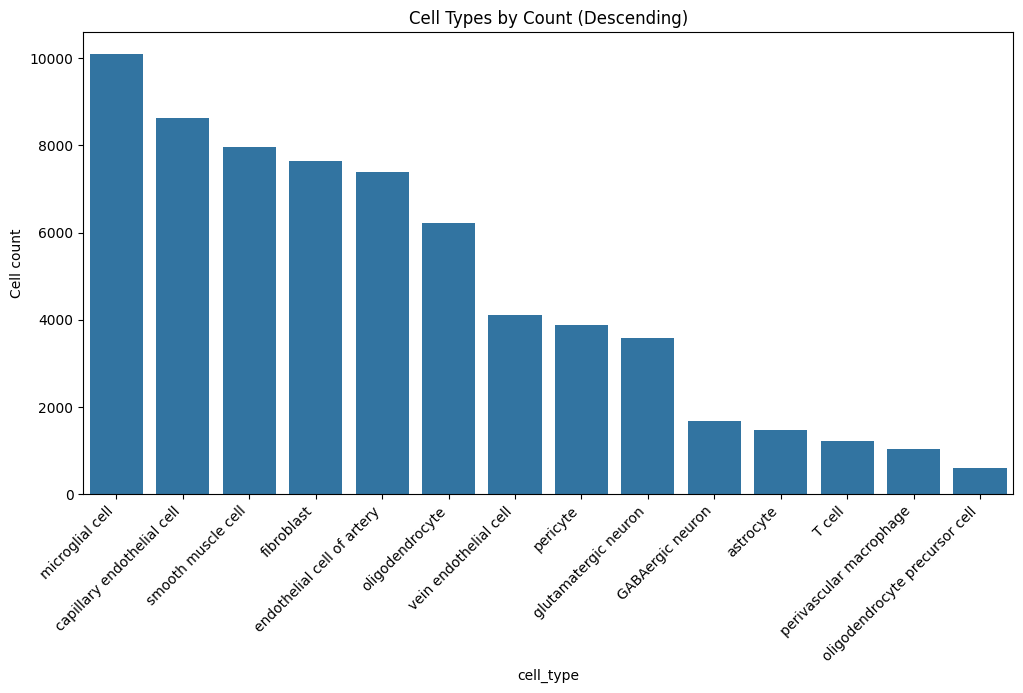

In [7]:
label_col = "cell_type"

# compute unique labels
num_labels = adata.obs[label_col].nunique()
print("Number of unique labels:", num_labels)

# Compute counts
top_counts = adata.obs[label_col].value_counts()

# Create a DataFrame to control order
df_plot = pd.DataFrame({'cell_type': top_counts.index, 'count': top_counts.values})

# Explicitly set the order for the x-axis (descending by count)
order = df_plot.sort_values('count', ascending=False)['cell_type']

plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='cell_type', y='count', order=order)
plt.xticks(rotation=45, ha='right')
plt.title("Cell Types by Count (Descending)")
plt.ylabel("Cell count")
plt.show()

# Check data sparsity and summary stats

In [8]:
print(f'Data type of X: {type(adata.X)}')

# Number of non-zero entries
nonzero_count = adata.X.nnz if hasattr(adata.X, 'nnz') else np.count_nonzero(adata.X)

# Total number of entries
total_entries = adata.X.shape[0] * adata.X.shape[1]

# Percentage of non-zero entries
nonzero_percentage = (nonzero_count / total_entries) * 100

print(f"Non-zero entries: {nonzero_count}")
print(f"Total entries: {total_entries}")
print(f"Percentage of non-zero entries: {nonzero_percentage:.2f}%")

Data type of X: <class 'scipy.sparse._csr.csr_matrix'>
Non-zero entries: 118901580
Total entries: 2059969340
Percentage of non-zero entries: 5.77%


# Inspect sample cell

In [9]:
cell_vector = adata.X[0].toarray().flatten()
df = pd.DataFrame({'gene': adata.var_names[:10], 'expression': cell_vector[:10]})
df

,gene,expression
0,ENSG00000238009,0.000000
1,ENSG00000241860,0.000000
2,ENSG00000237491,0.000000
3,ENSG00000228794,1.627274
4,ENSG00000225880,0.000000
5,ENSG00000230368,0.000000
6,ENSG00000272438,0.000000
7,ENSG00000230699,0.000000
8,ENSG00000223764,0.000000
9,ENSG00000187634,0.000000


# Gene mapping

In [10]:
# Pick a cell (e.g., first cell, or random)
cell_idx = 0  # or np.random.randint(0, adata.n_obs)
cell_vector = adata.X[cell_idx].toarray().flatten()  # convert sparse to dense

# Select top N expressed genes
top_n = 10
top_idx = np.argsort(cell_vector)[::-1][:top_n]
top_genes = adata.var_names[top_idx].tolist()

# Map Ensembl IDs to gene symbols and names
mg = mygene.MyGeneInfo()
result = mg.querymany(top_genes, scopes='ensembl.gene', fields='symbol,name', species='human')

# Convert to DataFrame
result_df = pd.DataFrame(result)[['query','symbol','name']]
result_df

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


,query,symbol,name
0,ENSG00000251562,MALAT1,metastasis associated lung adenocarcinoma transcript 1
1,ENSG00000080493,SLC4A4,solute carrier family 4 member 4
2,ENSG00000080824,HSP90AA1,heat shock protein 90 alpha family class A member 1
3,ENSG00000168702,LRP1B,LDL receptor related protein 1B
4,ENSG00000245532,NEAT1,nuclear paraspeckle assembly transcript 1
5,ENSG00000156113,KCNMA1,potassium calcium-activated channel subfamily M alpha 1
6,ENSG00000165995,CACNB2,calcium voltage-gated channel auxiliary subunit beta 2
7,ENSG00000114861,FOXP1,forkhead box P1
8,ENSG00000183098,GPC6,glypican 6
9,ENSG00000165084,C8orf34,chromosome 8 open reading frame 34


### Summary
- Dataset has ~65k cells × ~31k genes.
- 14 unique annotated cell types.
- Gene IDs are Ensembl identifiers; mapped to gene symbols.
- Expression matrix is sparse, as expected for scRNA-seq.
